# David Morin
#Project 3
#UID: 116539265

# Part 1

In [69]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import math

In [70]:
#creating the dataframe for the data from file

df = pd.read_csv('08_gap-every-five-years.tsv', sep = '\t')

In [71]:
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


##Part 1 Exercise 1

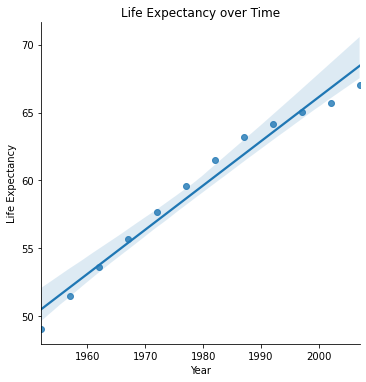

In [72]:
#Using mean values of life expectancy grouped by year to plot the change in life expectancy over time
mean_values = pd.DataFrame(df.groupby('year', as_index = False).mean())

scat_plot = sns.lmplot(x = 'year', y = 'lifeExp', data = mean_values)
scat_plot.set(title = "Life Expectancy over Time", xlabel = "Year", ylabel = "Life Expectancy")

#Part 1 Question 1

Life expectancy for these countries appears to increase over time. The trend is mainly linear as not to many points deviate too far from the regression line.

[Text(0.5, 1.0, 'Life Expectancy over Time'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Life Expectancy')]

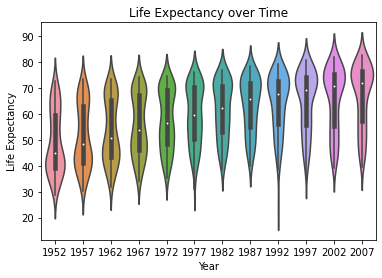

In [73]:
#Making a violinplot to show the distribution of life expectancy across countries over time

vplot = sns.violinplot(x = "year", y = "lifeExp", data = df)
vplot.set(title = "Life Expectancy over Time", xlabel = "Year", ylabel = "Life Expectancy")

##Part 1 Question 2

The distribution of life expectancy changes a lot as time increases. There is a negative skew in the distribution for earlier years (around 1952 - 1982). I can tell because the mean is closer to the bottom and the tails of the violin are pointed to the top. After 1982, the data becomes more positively skewed as the mean is towards the top of the data and tails of the violins are pointed towards the bottom. The data is bimodal for the years before 1982 and changes to unimodal for the years after that (based on the number of humps on the violin). Most of the years the distribution is not symmetric except for 1977 and 1982 where the data seems to be most symmetric for those distributions.

##Part 1 Question 3

I reject the null hypothesis given there is a generally linear increase in the mean life expectancy with each increase in time. 

##Part 1 Question 4

I'd expect the violin plot to generally look the same as the violin plot generated previously. There would be a linear relationship between the residuals and time because of the visibily linear relationship of life expectancy and time shown above. 

##Part 1 Question 5

As described previously, the violin plot should look relatively the same as the one above. Given the validity of the linear regression model, the main difference would be the distributions would all be centered around the mean and the shapes would be normally distributed. Since the input distribution varies a lot in the above violin plot, I would expect the distributions not to be symmetric. 

##Part 1 Exercise 2

In [74]:
#Make a linear model with the LinearRegression() function from sklearn
year = df['year']
lifeExp = df['lifeExp']

reg = LinearRegression().fit(year.values.reshape(year.count(), 1), lifeExp.values)

#Print the model
print("Linear Model: y = " + str(reg.coef_[0]) + "x " + str(reg.intercept_))

Linear Model: y = 0.3259038276371518x -585.6521874415448


##Part 1 Question 6

According to the linear model, life expectancy increases by a rate of 0.326 every year on average.  

##Part 1 Question 7

Due to the clear relationship identified in question 6, I would reject the null hypothesis of no realtionship between year and life expectancy.

##Part 1 Exercise 3

[Text(0.5, 1.0, 'Residuals of Linear Model vs Year'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Residuals')]

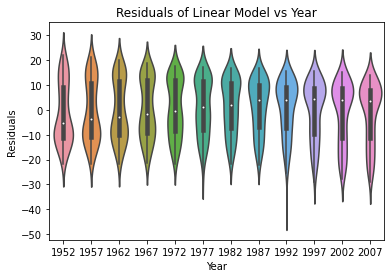

In [75]:
#Calculate the residulars with the predict() function
df['predictions'] = year.transform(lambda x: reg.predict([[x]])[0])
df['residuals'] = lifeExp - df['predictions']

#Creat a violin plot of residulas vs year
vplot = sns.violinplot(x = "year", y = "residuals", data = df)
vplot.set(title = "Residuals of Linear Model vs Year", xlabel = "Year", ylabel = "Residuals")

##Part 1 Question 8

I was mostly correct in my intution from question 4 for what the violin plot of residuals would look like. As I predicted, the general shape of each violin is the same as the one generated previously. There is also a generally linear realtionship between residuals and time which I also predicted. However, the relationship between residuals and time seems to stop increasing linearly around 1987 where it begains to taper off. Some other differences in the graph I did not predict was the peak values of each violin to decrease over time.

##Part 1 Exercise 4

[Text(0.5, 1.0, 'Residuals vs Continent'),
 Text(0.5, 0, 'Continent'),
 Text(0, 0.5, 'Residuals')]

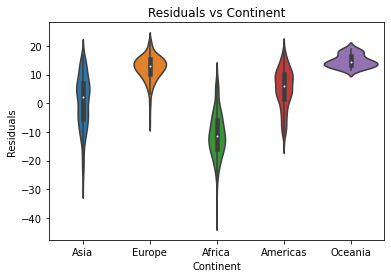

In [76]:
#Create a violin plot for the the residuals vs continent
vplot = sns.violinplot(x = "continent", y = "residuals", data = df)
vplot.set(title = "Residuals vs Continent", xlabel="Continent", ylabel="Residuals")

##Part 1 Question 9

Clearly, there is a dependence between model residual and continent. Each violin in the plot varies in shape, mean values, peaks and valley values, distribution, and skewness. This suggests that continent needs to be taken into account when performaing a regression analysis for life expectancy across time, as the year is not an accurate enough indicator to solely predict life expectancy. 

##Part 1 Exercise 5

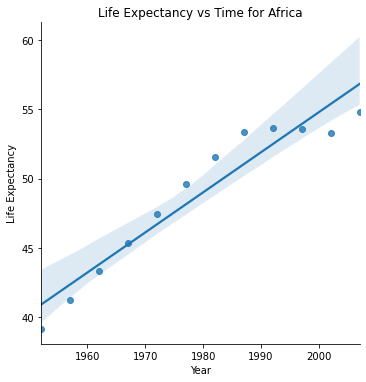

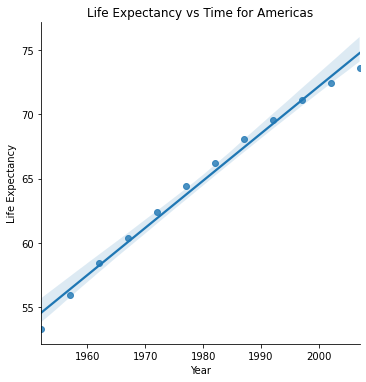

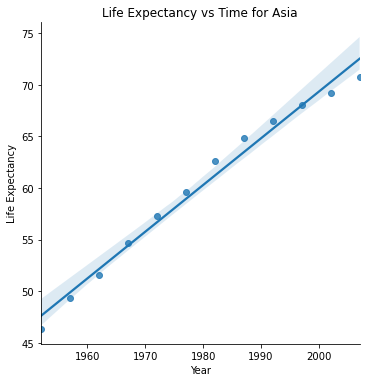

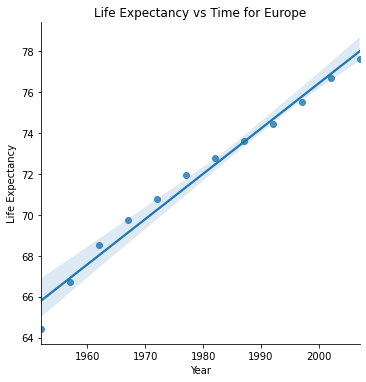

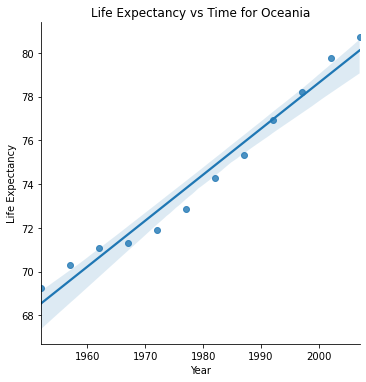

In [77]:
#group the data by continents
continents = df.groupby('continent')

#Create a plot of life expectancy vs year for each continent
for name, group in continents:
    
    group = group.reset_index()
    mean_values = pd.DataFrame(group.groupby('year', as_index = False).mean())
    
    scat_plot = sns.lmplot(x = 'year',y = 'lifeExp',data = mean_values)
    scat_plot.set(title = "Life Expectancy vs Time for " + name, xlabel = "Year", ylabel = "Life Expectancy") 

##Part 1 Question 10

The regression model should absolutely include an interaction term for continent and year. After plotting the life expectancy vs time for each continent in the dataset, the regression lines differe from continent to continent. Therefore, the continent as well as year is an important indicator for predicting life expectancy, so it should be an interaction term in a regression model of continent and year. 

##Part 1 Exercise 6

In [78]:
num_years = year.count()
num_row = 0
continent_matrix = np.zeros((num_years, 5))

#Creating a matrix to represent the years for each continent
for index, row in df.iterrows():
    if row['continent'] == 'Africa':
        continent_matrix[num_row, 0] = row['year']
    elif row['continent'] == 'Americas':
        continent_matrix[num_row, 1] = row['year']
    elif row['continent'] == 'Asia':
        continent_matrix[num_row, 2] = row['year']
    elif row['continent'] == 'Europe':
        continent_matrix[num_row, 3] = row['year']
    else:
        continent_matrix[num_row, 4] = row['year']
    
    num_row += 1

#Using Polynomial Features with the created matrix to transform data
poly = PolynomialFeatures(include_bias = False, interaction_only = True)
new_matrix = poly.fit_transform(continent_matrix)

#Generating the linear model
reg = LinearRegression().fit(new_matrix, lifeExp)

#Printing linear model
print("Linear Model: y = " + str(reg.coef_[0]) + "x1 + " + str(reg.coef_[1]) 
      + "x2 + " + str(reg.coef_[2]) + "x3 + " + str(reg.coef_[3]) + "x4 + " + str(reg.coef_[4]) 
      + "x5 " + str(reg.intercept_))


Linear Model: y = 0.3205419803615902x1 + 0.32852579564530415x2 + 0.32621176602563895x3 + 0.3321744288871519x4 + 0.33339725453987645x5 -585.6521874415466


##Part 1 Question 11

In [79]:
print(reg.coef_)

[0.32054198 0.3285258  0.32621177 0.33217443 0.33339725 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


The parameters in the model are not significantly different from zero. There are 5 parameters above 0 only by a max of 0.33, and the rest of the 10 paramaters are zero.

##Part 1 Question 12

In [80]:
print("The life expectancy for Africa increases " + str(reg.coef_[0]) + " years each year" )
print("The life expectancy for the Americas increases " + str(reg.coef_[0]) + " years each year" )
print("The life expectancy for Asia increases " + str(reg.coef_[0]) + " years each year" )
print("The life expectancy for Europe increases " + str(reg.coef_[0]) + " years each year" )
print("The life expectancy for Oceania increases " + str(reg.coef_[0]) + " years each year" )

The life expectancy for Africa increases 0.3205419803615902 years each year
The life expectancy for the Americas increases 0.3205419803615902 years each year
The life expectancy for Asia increases 0.3205419803615902 years each year
The life expectancy for Europe increases 0.3205419803615902 years each year
The life expectancy for Oceania increases 0.3205419803615902 years each year


I know this because the continent matrix I created earlier was ordered to sort the years into different columns per continent. Therefore, 0 column in the matrix corresponded to Africa, 1 column corresponed to the Americas, 2 column corresponded to Asia, 3 column corresponded to Europe, and 4 column corresponded to Oceania.

##Part 1 Exercise 7

[Text(0.5, 1.0, 'Residuals vs Year w/ new linear model'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Residuals')]

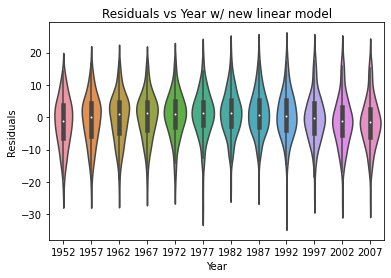

In [81]:
#Creating residuals with new linear model
df['new_predictions'] = reg.predict(new_matrix)
df['new_residuals'] = lifeExp - df['new_predictions']

# Creating a residuals vs year violin plot
plot = sns.violinplot(x = "year", y = "new_residuals", data = df)
plot.set(title="Residuals vs Year w/ new linear model", xlabel = "Year", ylabel = "Residuals")

This linear model is a much better model to predict the life expectancy accurately. The distributions are mostly unimodal and not skewed. Also, the means are all around 0. Adding in the interaction term for continent and year clearly improved the model.

# Part 2

The dataset I chose to use comes from sklearn's iris dataset. This dataset contains 3 classes with 50 samples in each class, totaling at 150 samples for the entire dataset. I will be using sepal length, sepal width, petal length, and petal width as predictors to predict the type of flower.

In [82]:
#load the dataset into a Data Frame
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)

#Make a testing a training set for the data
X = iris_data.data
y = iris_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


##Decision Tree

In [83]:
#Create the decision tree classifier and train it
dtree = DecisionTreeClassifier().fit(X_train, y_train)

#10-fold cross validation
cv_scores = cross_val_score(dtree, X, y, cv = 10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (cv_scores.mean(), cv_scores.std()))
print("Standard error is " + str((cv_scores.std())/ math.sqrt(10)))

0.96 accuracy with a standard deviation of 0.04
Standard error is 0.013984117975602018


##k-NN Classification

In [84]:
#Create and train the k-NN classifier
neighbors = KNeighborsClassifier().fit(X_train, y_train)

#10-fold cross validation
cv_scores = cross_val_score(neighbors, X, y, cv = 10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (cv_scores.mean(), cv_scores.std()))
print("Standard error is " + str((cv_scores.std())/ math.sqrt(10)))

0.97 accuracy with a standard deviation of 0.04
Standard error is 0.014142135623730947


Both classifiers (decision tree and k-NN) used 10-fold cross validation to determine accuracy as well as the error in that estimate. The 10-fold cross validations on both classifiers yielded highly accurate results with very low standard errors. This suggests that we chose good predictors from the datasets to perform the cross validation on. 